### Tasks
- Read data from Shangai Tech Dataset
- Crop images into parts of 4
- Check if the split image has any person
-- If YES then apply clustering and form clusters
-- If NO then move on
- Once clustered, classify image as DENSE, MEDIUM or SPARSE

In [1]:
source_image = "sample_image.jpg"
source_ground_truth = "gt_sample_image.mat"

Step 1: Loading sample image

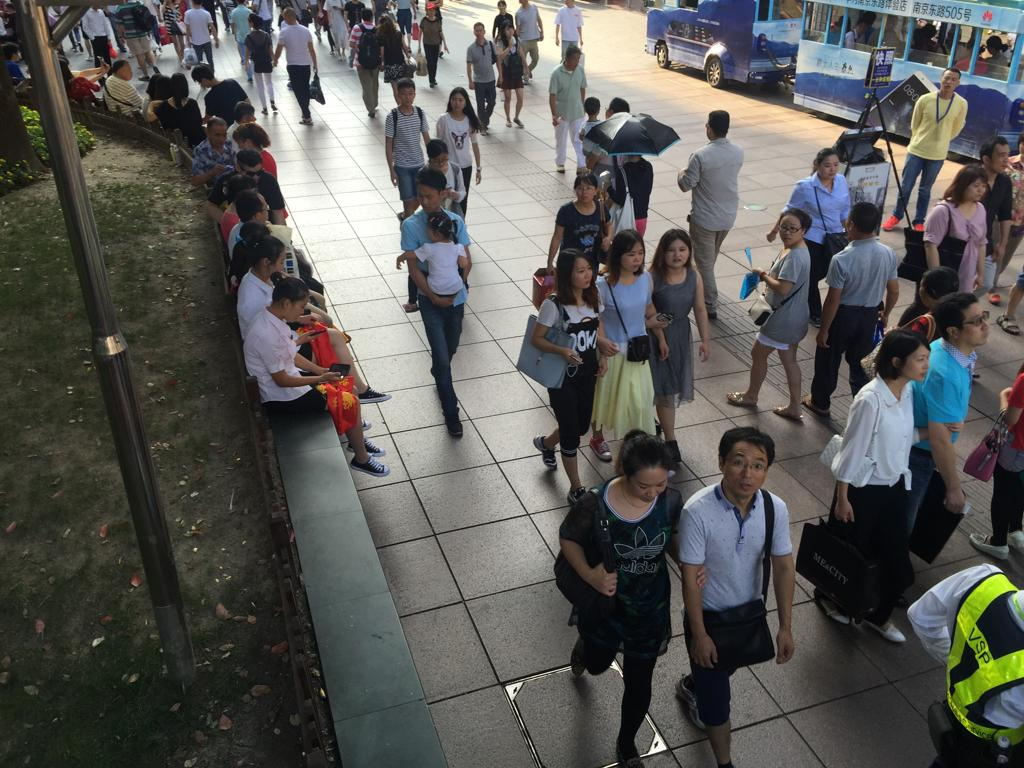

In [15]:
from PIL import Image
import cv2
import numpy as np

pil_image = Image.open(source_image)
cv_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_BGR2RGB)

display(pil_image)

Loading ground truth

In [39]:
!pip install mat4py

Defaulting to user installation because normal site-packages is not writeable


In [5]:
from mat4py import loadmat

data = loadmat('gt_sample_image.mat')
print("Raw Source Data:")
print(data)

pts = []
for loc in data['image_info']['location']:
    pts.append((int(loc[0]), int(loc[1])))

total_count = data['image_info']['number']
print("Total Count:")
print(total_count)
print("Points:")
print(pts)

Raw Source Data:
{'image_info': {'location': [[746.4944308031744, 473.0134870645173], [650.6686594783106, 491.83018397921785], [917.0643037614323, 364.64325112985307], [976.9989680082563, 331.19134550371876], [949.1223799864774, 87.27120031315609], [974.2113092060782, 184.83925838938111], [1003.4817266289459, 148.59969396106902], [942.1532329810328, 287.98263406996193], [864.098786520053, 218.29116401551548], [793.0134870645176, 230.8356286253158], [832.0407102950076, 169.50713497740298], [720.5343582078931, 130.4799117469129], [675.9318173730475, 254.5307284438276], [635.5107647414684, 260.1060460481833], [578.3637592968222, 275.4381694601616], [586.7267357033558, 194.5960641970037], [440.37464858901825, 233.62328742749364], [430.6178427813957, 201.56521120244832], [440.37464858901825, 155.56884096651365], [458.4944308031744, 103.99715312622321], [296.8102202768586, 297.7394398775844], [275.90277926052454, 257.31838724600544], [590.0951567559873, 109.92092808085127], [619.365574178854

Annotating People

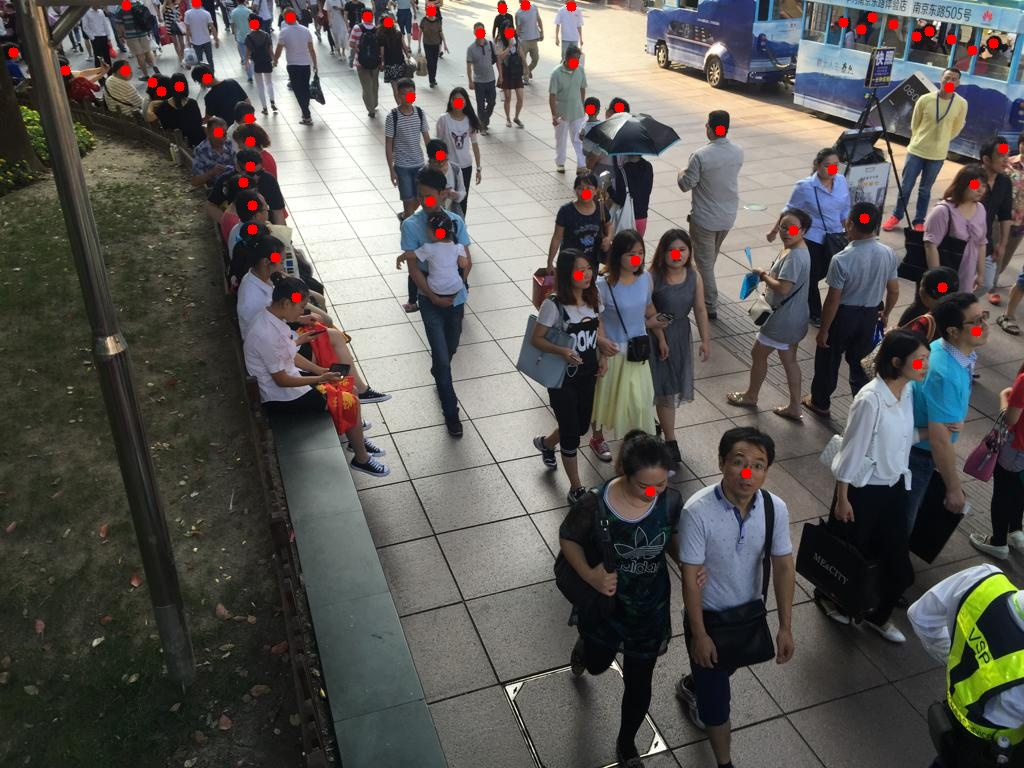

In [18]:
for loc in pts:
    cv2.circle(cv_image, loc, radius=5, color=(0, 0, 255), thickness=-1)

cv2.imwrite("result.jpg", cv_image)
display(Image.open("result.jpg"))